Code comes from Josephlee94 on github

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('housepricedata.csv')

In [3]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [4]:
dataset = df.values

In [6]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [7]:
X = dataset[:,0:10]
Y= dataset[:,10]

In [8]:
from sklearn import preprocessing

In [9]:
min_max_scalar = preprocessing.MinMaxScaler()
X_scale = min_max_scalar.fit_transform(X)

In [10]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [13]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [14]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [15]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [16]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [17]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 0s 133us/step - loss: 0.6929 - accuracy: 0.5098 - val_loss: 0.6934 - val_accuracy: 0.4932
Epoch 2/100
1022/1022 [==============================] - 0s 26us/step - loss: 0.6866 - accuracy: 0.5059 - val_loss: 0.6864 - val_accuracy: 0.4795
Epoch 3/100
1022/1022 [==============================] - 0s 30us/step - loss: 0.6805 - accuracy: 0.5479 - val_loss: 0.6801 - val_accuracy: 0.5479
Epoch 4/100
1022/1022 [==============================] - 0s 27us/step - loss: 0.6753 - accuracy: 0.6223 - val_loss: 0.6748 - val_accuracy: 0.6256
Epoch 5/100
1022/1022 [==============================] - 0s 28us/step - loss: 0.6709 - accuracy: 0.6957 - val_loss: 0.6703 - val_accuracy: 0.7215
Epoch 6/100
1022/1022 [==============================] - 0s 27us/step - loss: 0.6667 - accuracy: 0.7260 - val_loss: 0.6659 - val_accuracy: 0.7854
Epoch 7/100
1022/1022 [==============================] - 0s 29us/step - loss

Epoch 56/100
1022/1022 [==============================] - 0s 24us/step - loss: 0.3372 - accuracy: 0.8728 - val_loss: 0.3516 - val_accuracy: 0.8676
Epoch 57/100
1022/1022 [==============================] - 0s 24us/step - loss: 0.3347 - accuracy: 0.8708 - val_loss: 0.3493 - val_accuracy: 0.8676
Epoch 58/100
1022/1022 [==============================] - 0s 22us/step - loss: 0.3313 - accuracy: 0.8787 - val_loss: 0.3474 - val_accuracy: 0.8584
Epoch 59/100
1022/1022 [==============================] - 0s 23us/step - loss: 0.3293 - accuracy: 0.8728 - val_loss: 0.3454 - val_accuracy: 0.8721
Epoch 60/100
1022/1022 [==============================] - 0s 22us/step - loss: 0.3270 - accuracy: 0.8738 - val_loss: 0.3435 - val_accuracy: 0.8721
Epoch 61/100
1022/1022 [==============================] - 0s 25us/step - loss: 0.3242 - accuracy: 0.8767 - val_loss: 0.3418 - val_accuracy: 0.8584
Epoch 62/100
1022/1022 [==============================] - 0s 22us/step - loss: 0.3223 - accuracy: 0.8767 - val_loss: 0

In [19]:
model.evaluate(X_test, Y_test)[1]

219/219 [==============================] - 0s 19us/step


0.8584474921226501

In [20]:
import matplotlib.pyplot as plt

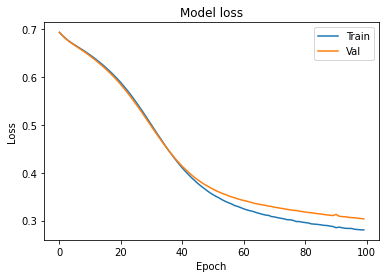

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

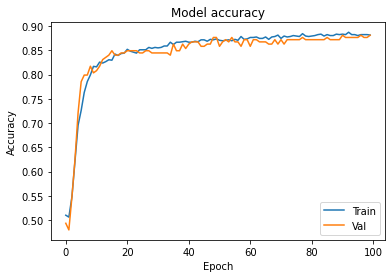

In [28]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [29]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.4491 - accuracy: 0.7926 - val_loss: 0.3895 - val_accuracy: 0.8447
Epoch 2/100
1022/1022 [==============================] - 1s 970us/step - loss: 0.3537 - accuracy: 0.8601 - val_loss: 0.3982 - val_accuracy: 0.8676
Epoch 3/100
1022/1022 [==============================] - 1s 999us/step - loss: 0.3353 - accuracy: 0.8796 - val_loss: 0.3389 - val_accuracy: 0.8493
Epoch 4/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.2934 - accuracy: 0.8845 - val_loss: 0.2959 - val_accuracy: 0.9041
Epoch 5/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.2823 - accuracy: 0.8885 - val_loss: 0.3350 - val_accuracy: 0.8356
Epoch 6/100
1022/1022 [==============================] - 1s 983us/step - loss: 0.2841 - accuracy: 0.8796 - val_loss: 0.3118 - val_accuracy: 0.8904
Epoch 7/100
1022/1022 [==============================] - 1s 950us/step - loss

1022/1022 [==============================] - 1s 992us/step - loss: 0.1862 - accuracy: 0.9237 - val_loss: 0.3548 - val_accuracy: 0.8904
Epoch 57/100
1022/1022 [==============================] - 1s 966us/step - loss: 0.1730 - accuracy: 0.9374 - val_loss: 0.3376 - val_accuracy: 0.9087
Epoch 58/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1555 - accuracy: 0.9364 - val_loss: 0.3611 - val_accuracy: 0.8995
Epoch 59/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1679 - accuracy: 0.9207 - val_loss: 0.3409 - val_accuracy: 0.8904
Epoch 60/100
1022/1022 [==============================] - 1s 980us/step - loss: 0.1456 - accuracy: 0.9384 - val_loss: 0.3736 - val_accuracy: 0.8721
Epoch 61/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1405 - accuracy: 0.9403 - val_loss: 0.3839 - val_accuracy: 0.8995
Epoch 62/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1469 - accuracy: 0.9384 - val_loss: 0.4599 - val_ac

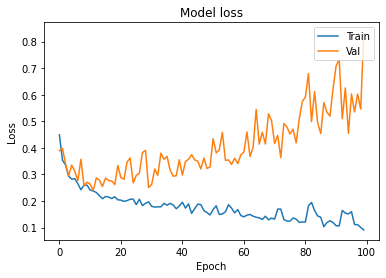

In [30]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

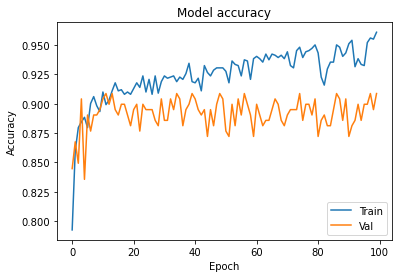

In [32]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [33]:
from keras.layers import Dropout
from keras import regularizers

In [34]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [35]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 2s 2ms/step - loss: 14.2126 - accuracy: 0.6840 - val_loss: 3.8404 - val_accuracy: 0.8402
Epoch 2/100
1022/1022 [==============================] - 1s 1ms/step - loss: 1.6867 - accuracy: 0.8444 - val_loss: 0.6948 - val_accuracy: 0.8402
Epoch 3/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.5847 - accuracy: 0.8523 - val_loss: 0.6080 - val_accuracy: 0.8037
Epoch 4/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.5318 - accuracy: 0.8699 - val_loss: 0.5081 - val_accuracy: 0.8721
Epoch 5/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.5042 - accuracy: 0.8728 - val_loss: 0.5201 - val_accuracy: 0.8493
Epoch 6/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.5064 - accuracy: 0.8581 - val_loss: 0.4822 - val_accuracy: 0.8676
Epoch 7/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.477

Epoch 57/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.4716 - accuracy: 0.8718 - val_loss: 0.4587 - val_accuracy: 0.8767
Epoch 58/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.4450 - accuracy: 0.8875 - val_loss: 0.4361 - val_accuracy: 0.8630
Epoch 59/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.4461 - accuracy: 0.8767 - val_loss: 0.4325 - val_accuracy: 0.8813
Epoch 60/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.4265 - accuracy: 0.8865 - val_loss: 0.4283 - val_accuracy: 0.8813
Epoch 61/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.4349 - accuracy: 0.8855 - val_loss: 0.4441 - val_accuracy: 0.8767
Epoch 62/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.4333 - accuracy: 0.8904 - val_loss: 0.4417 - val_accuracy: 0.8813
Epoch 63/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.4314 - accuracy: 0.8885 - val_loss: 0.4557 -

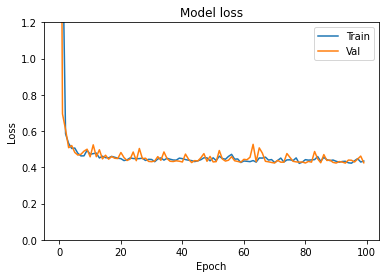

In [36]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

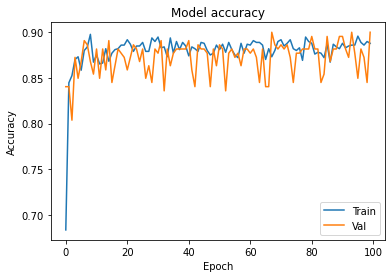

In [37]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()